In [58]:
# !pip install rioxarray
# !pip install numpy
# !pip install plotly
# !pip install matplotlib
#!pip install s2cloudless

In [59]:
import matplotlib.image as mpimg
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import rioxarray
from s2cloudless import S2PixelCloudDetector, download_bands_and_valid_data_mask
from osgeo import gdal

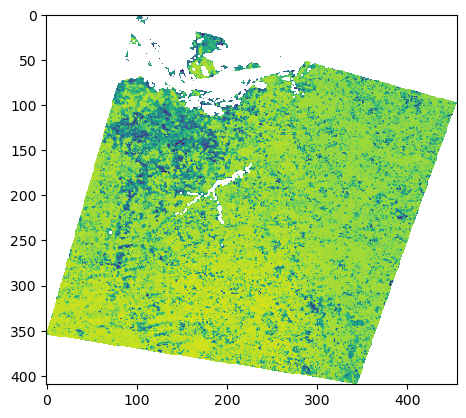

In [60]:
dataset = gdal.Open('MOD17A2H.061_Gpp_500m_doy2021001_aid0001.tif') # Abrindo a imagem com o gdal

bd1 = dataset.GetRasterBand(1).ReadAsArray() # Pegando a primeira (e única nesse caso) banda do satélite e lendo-a como um array

resultado = np.copy(bd1).astype(float) # Precisa colocar como float para evitar erros

indices_substituir = np.isin(bd1, [32761, 32762, 32763, 32764, 32765, 32766, 32767])

resultado[indices_substituir] = np.nan # Substituindo os valores acima como nan para não aparecerem no plot


plt.imshow(resultado)

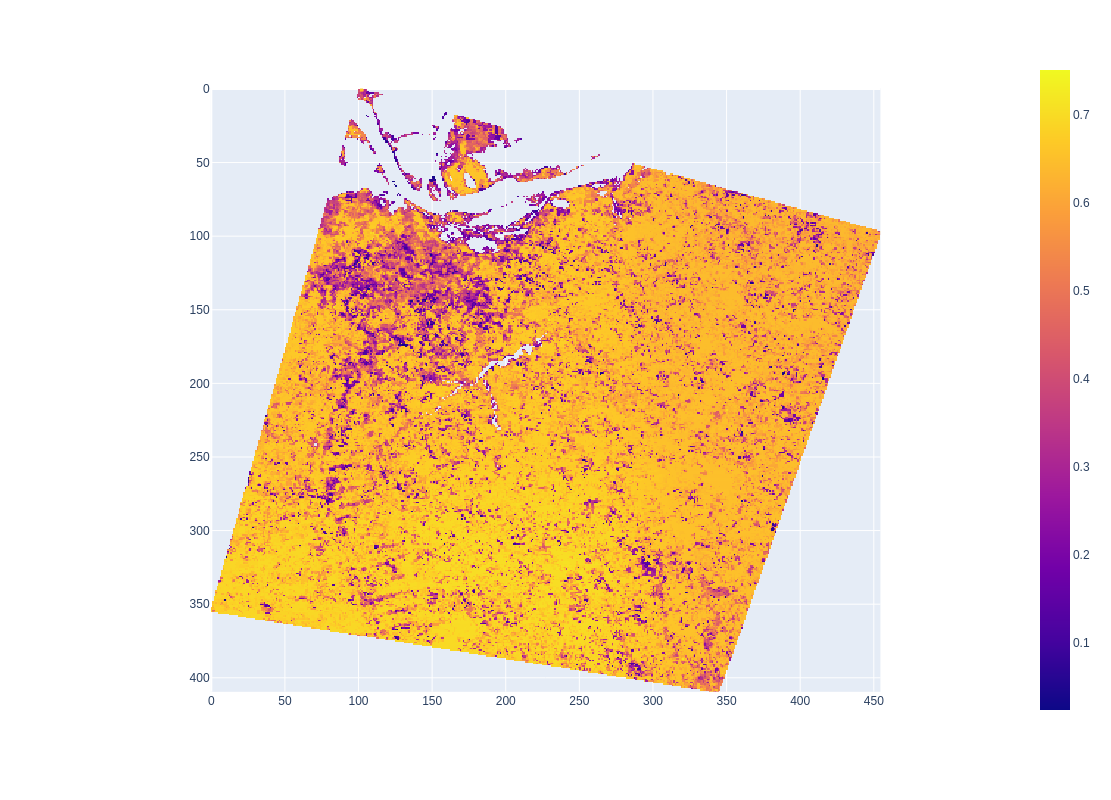

In [172]:
px.imshow(resultado / 1000 ,width=1200, height=800) # Plotly, dividindo por 1000 devido à escala

In [173]:
# import os

# # Especifique o caminho para a pasta
# caminho_pasta = './imagens_santarem/'

# # Use a função listdir para obter uma lista de arquivos na pasta
# arquivos_na_pasta = os.listdir(caminho_pasta)

# bands = []

# for arquivo in arquivos_na_pasta:
#     imagens = gdal.Open(f'./imagens_santarem/{arquivo}')
    
#     for raster_band in [1 if imagens.RasterCount == 1 else range(1,imagens.RasterCount)]:
#         data_img = imagens.GetRasterBand(raster_band).ReadAsArray()
        
#         copia = np.copy(data_img).astype(float) # Precisa colocar como float para evitar erros
        
#         indices_substituir = np.isin(copia, [-9999])
        
#         copia[indices_substituir] = np.nan # Substituindo os valores acima como nan para não aparecerem no plot
        
#         bands.append(copia)

## rioxarray

In [14]:
geotiff_file = rioxarray.open_rasterio('MOD17A2H.061_Gpp_500m_doy2021001_aid0001.tif',masked=True)
geotiff_file

<xarray.DataArray (band: 1, y: 410, x: 455)>
[186550 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -6.136e+06 -6.135e+06 ... -5.926e+06 -5.926e+06
  * y            (y) float64 -2.365e+05 -2.37e+05 ... -4.256e+05 -4.26e+05
    spatial_ref  int32 0
Attributes:
    add_offset:     0.0
    AREA_OR_POINT:  Area
    scale_factor:   0.0001
    units:          kg C m2

In [23]:
exclude_values = [32761, 32762, 32763, 32764, 32765, 32766]

mask = ~geotiff_file.isin(exclude_values)

geotiff_file.where(mask)

<xarray.DataArray (band: 1, y: 410, x: 455)>
array([[[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan, 652., 651.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
...
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 521., 643.,
         643., 506., 383., 554., 515.,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan]]], dtype=float32)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -6.136e+06 -6.135e+06 ... -5.926e+06 -5.926e+06
  * y            (y) float64 -2.365e+05 -2.37e+05 ... -4.256e+05 -4.26e+05
    spatial_ref  int32 0
Attributes:
    add_offset:     0.0
    AREA_OR_POINT:  Area
    scale_factor:   0.0001
    units:          kg C m2

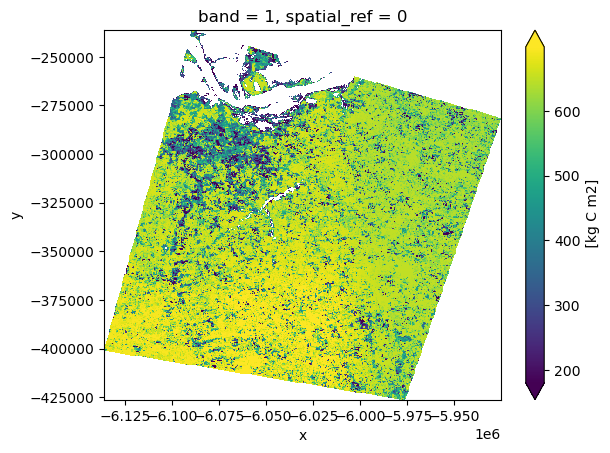

In [30]:
geotiff_file.where(mask).plot(robust=True)

In [25]:
geotiff_file.values

array([[[       nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,  